In [58]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig

In [7]:
#Defining a simple data
Marks=np.array([[3,4],[2,8],[6,9]])
print(Marks)

[[3 4]
 [2 8]
 [6 9]]


In [11]:
Marks_df=pd.DataFrame(Marks,columns=["Physics","Maths"])
Marks_df

,Physics,Maths
0,3,4
1,2,8
2,6,9


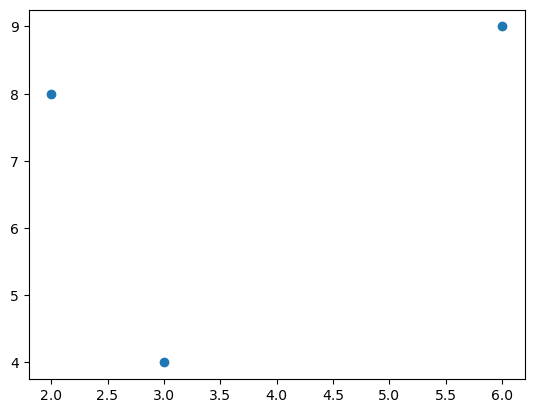

In [21]:
plt.scatter(Marks_df["Physics"],Marks_df["Maths"])

In [29]:
#MAking Data mean centric
Meanbycolumn=np.mean(Marks.T,axis=1)
print(Meanbycolumn)

Scaled_Data=Marks-Meanbycolumn

[3.66666667 7.        ]


In [31]:
Marks.T

array([[3, 2, 6],
       [4, 8, 9]])

In [33]:
Scaled_Data


array([[-0.66666667, -3.        ],
       [-1.66666667,  1.        ],
       [ 2.33333333,  2.        ]])

In [35]:
#Finding Covariance matrix
cov_mat=np.cov(Scaled_Data.T)
cov_mat

#Covariance a,b=[Cov a,a  Cov a,b
#                Cov b,a  Cov b,b]

array([[4.33333333, 2.5       ],
       [2.5       , 7.        ]])

In [60]:
#Finding out eigrn values and eigen vector of above covariance matrix
Eval,Evec=eig(cov_mat)
print(Eval)
print(Evec)

[2.83333333 8.5       ]
[[-0.85749293 -0.51449576]
 [ 0.51449576 -0.85749293]]


In [62]:
#Get original Data Projected to principal components as new axis
Projected_Data=Evec.T.dot(Scaled_Data.T)
print(Projected_Data.T)

[[-9.71825316e-01  2.91547595e+00]
 [ 1.94365063e+00  1.11022302e-16]
 [-9.71825316e-01 -2.91547595e+00]]


In [64]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit_transform(Marks)

array([[-2.91547595e+00,  9.71825316e-01],
       [ 6.86635020e-16, -1.94365063e+00],
       [ 2.91547595e+00,  9.71825316e-01]])

------------------------------------------------------------------PCA ON DATASET---------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
Univ1=pd.read_excel("University_Clustering.xlsx")
Univ1.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90


In [3]:
Univ1.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [5]:
Univ1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   State     25 non-null     object
 2   SAT       25 non-null     int64 
 3   Top10     25 non-null     int64 
 4   Accept    25 non-null     int64 
 5   SFRatio   25 non-null     int64 
 6   Expenses  25 non-null     int64 
 7   GradRate  25 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.7+ KB


In [7]:
univ=Univ1.drop(["State"],axis=1)

In [9]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [10]:
univ.data=univ.iloc[:,1:]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14364\2202206332.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  univ.data=univ.iloc[:,1:]


In [11]:
#Normalizing the data
uni_normal=scale(univ.data)
uni_normal


array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [35]:
pca=PCA(n_components=6)
pca_values=pca.fit_transform(uni_normal)
var=pca.explained_variance_ratio_
var


array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

In [31]:
after_pca=pd.DataFrame(pca_values)

In [33]:
after_pca

,0,1,2,3,4,5
0,1.009874,-1.064310,0.081066,-0.056951,-0.128754,-0.034650
1,2.822238,2.259045,0.836829,-0.143845,-0.125962,-0.180703
2,-1.112466,1.631209,-0.266787,-1.075075,-0.191814,0.345679
3,0.741741,-0.042187,0.060501,0.157208,-0.577611,0.109163
4,0.311912,-0.635244,0.010241,-0.171364,0.012726,-0.016921
5,1.696691,-0.344363,-0.253408,-0.012564,-0.052661,-0.027166
6,1.246821,-0.490984,-0.032094,0.205644,0.293505,-0.078012
7,0.338750,-0.785169,-0.493585,-0.039856,-0.544979,-0.155372
8,2.374150,-0.386539,0.116098,0.453366,-0.230108,0.266984
9,1.403277,2.119515,-0.442827,0.632543,0.230054,-0.235615


In [30]:
#PCA weights
pca.components_

array([[ 0.45774863,  0.42714437, -0.42430805, -0.39064831,  0.36252316,
         0.37940403],
       [ 0.03968044, -0.19993153,  0.32089297, -0.43256441,  0.6344864 ,
        -0.51555367],
       [ 0.1870388 ,  0.49780855, -0.15627899,  0.60608085,  0.20474114,
        -0.53247261],
       [-0.13124033, -0.37489567, -0.0612872 ,  0.50739095,  0.62340055,
         0.43863341],
       [ 0.02064583,  0.4820162 ,  0.8010936 ,  0.07682369,  0.07254775,
         0.33810965],
       [ 0.8580547 , -0.39607492,  0.21693361,  0.1720479 , -0.17376309,
        -0.00353754]])

In [34]:
pca.components_[0]

array([ 0.45774863,  0.42714437, -0.42430805, -0.39064831,  0.36252316,
        0.37940403])

In [36]:
#To check the cumulative variance
varl=np.cumsum(np.round(var,decimals=4)*100)
varl

array([ 76.87,  89.98,  94.76,  97.49,  99.56, 100.  ])

----------------------------------------------------------Applying PCA in homeprices Dataset--------------------------------------------

In [22]:
import numpy as np
import pandas as pd
df=pd.read_csv("homeprices.csv")
df.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [24]:
df.describe()

,area,price
count,13.000000,13.000000
mean,3146.153846,629230.769231
std,453.900475,57621.109914
min,2600.000000,550000.000000
25%,2800.000000,585000.000000
50%,3100.000000,615000.000000
75%,3600.000000,680000.000000
max,4000.000000,725000.000000


In [28]:
df.info() #from here we understand Index, Non null count , columns , Datatype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   town    13 non-null     object
 1   area    13 non-null     int64 
 2   price   13 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 444.0+ bytes


In [30]:
home=df.drop(["town"],axis=1)
home.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [34]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [36]:
#now scaling the data 
home_scaled=scale(home)
home_scaled

array([[-1.25237795, -1.43117686],
       [-0.33514339, -1.1602259 ],
       [ 0.12347388, -0.34737302],
       [ 1.04070844,  0.91706478],
       [ 1.95794299,  1.72991766],
       [-1.25237795, -0.79895796],
       [-0.79376067, -0.25705604],
       [ 0.35278252,  0.37516287],
       [ 1.04070844,  1.4589667 ],
       [-1.25237795, -0.97959193],
       [-0.56445203, -0.528007  ],
       [-0.10583476, -0.16673905],
       [ 1.04070844,  1.18801574]])

In [40]:
#Now applying PCA
pca=PCA(n_components=2)
pca_vlaues=pca.fit_transform(home_scaled)
var=pca.explained_variance_ratio_
var

array([0.96592419, 0.03407581])

In [44]:
pca.components_

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [46]:
pca.components_[0]

array([0.70710678, 0.70710678])

In [48]:
#To check the cumulative variance
varl=np.cumsum(np.round(var,decimals=4)*100)
varl

array([ 96.59, 100.  ])